In [1]:
import numpy as np
from PIL import Image
import os
from skimage import data
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters.rank import gradient
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
mask_path = '../test_results/mask_target/'
masks = []
for filename in os.listdir(mask_path):
	img = Image.open(mask_path+filename,'r')
	img = np.array(img).astype(np.float32)
	img /= 255.0
	masks.append(np.expand_dims(img,axis=0))
masks = np.array(masks)
print masks.shape

G1_path = '../test_results/G1/'
G1_images = []
for filename in os.listdir(G1_path):
	img = Image.open(G1_path+filename,'r')
	img = np.array(img).astype(np.float32) #HWC
	img = np.transpose(img,[2,0,1])
	img -= 127.5
	img /= 127.5
	G1_images.append(img)

G1_images = np.array(G1_images)
print G1_images.shape

G2_path = '../test_results/G2/'
G2_images = []
for filename in os.listdir(G2_path):
	img = Image.open(G2_path+filename,'r')
	img = np.array(img).astype(np.float32) #HWC
	img = np.transpose(img,[2,0,1])
	img -= 127.5
	img /= 127.5
	G2_images.append(img)

G2_images = np.array(G2_images)
print G2_images.shape

target_path = '../test_results/x_target/'
target_images = []
for filename in os.listdir(target_path):
	img = Image.open(target_path+filename,'r')
	img = np.array(img).astype(np.float32) #HWC
	img = np.transpose(img,[2,0,1])
	img -= 127.5
	img /= 127.5
	target_images.append(img)

target_images = np.array(target_images).astype(np.float32)
print target_images.shape

(400, 1, 256, 256)
(400, 3, 256, 256)
(400, 3, 256, 256)
(400, 3, 256, 256)


In [3]:
num_images = 400
G1s = 0.0
G2s = 0.0
tars = 0.0
for i in xrange(num_images):
	G1img = rgb2gray(G1_images[i].transpose(1,2,0))
	G2img = rgb2gray(G2_images[i].transpose(1,2,0))
	tarimg = rgb2gray(target_images[i].transpose(1,2,0))
	selection_element = disk(5)
	G1sharp = gradient(G1img,selection_element)
	G2sharp = gradient(G2img,selection_element)
	tarsharp = gradient(tarimg,selection_element)
	G1s += np.mean(abs(G1sharp))
	G2s += np.mean(abs(G2sharp))
	tars += np.mean(abs(tarsharp))

/Users/vivek1410patel/Library/Python/2.7/lib/python/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [4]:
G1img = rgb2gray(G1_images[0].transpose(1,2,0))
G2img = rgb2gray(G2_images[0].transpose(1,2,0))
tarimg = rgb2gray(target_images[0].transpose(1,2,0))
G1sharp = gradient(G1img,selection_element)
G2sharp = gradient(G2img,selection_element)
tarsharp = gradient(tarimg,selection_element)

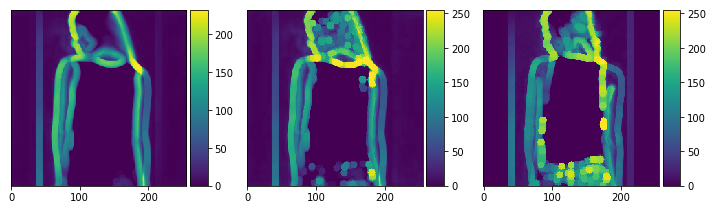

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,12))
im1 = ax1.imshow(G1sharp)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im1,cax1)
im2 = ax2.imshow(G2sharp)
ax2.yaxis.set_visible(False)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im2,cax2)
im3 = ax3.imshow(tarsharp)
ax3.yaxis.set_visible(False)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im3,cax3)

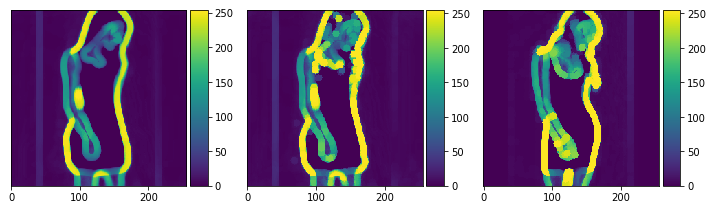

In [17]:
index = 20
G1img = rgb2gray(G1_images[index].transpose(1,2,0))
G2img = rgb2gray(G2_images[index].transpose(1,2,0))
tarimg = rgb2gray(target_images[index].transpose(1,2,0))
G1sharp = gradient(G1img,selection_element)
G2sharp = gradient(G2img,selection_element)
tarsharp = gradient(tarimg,selection_element)
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,12))
im1 = ax1.imshow(G1sharp)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im1,cax1)
im2 = ax2.imshow(G2sharp)
ax2.yaxis.set_visible(False)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im2,cax2)
im3 = ax3.imshow(tarsharp)
ax3.yaxis.set_visible(False)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im3,cax3)

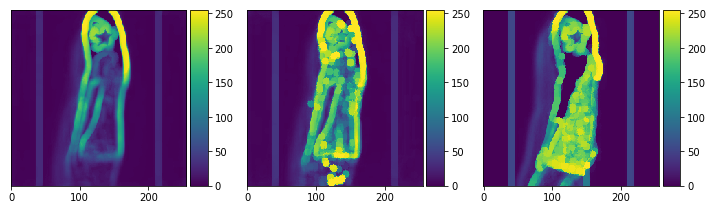

In [18]:
index = 100
G1img = rgb2gray(G1_images[index].transpose(1,2,0))
G2img = rgb2gray(G2_images[index].transpose(1,2,0))
tarimg = rgb2gray(target_images[index].transpose(1,2,0))
G1sharp = gradient(G1img,selection_element)
G2sharp = gradient(G2img,selection_element)
tarsharp = gradient(tarimg,selection_element)
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,12))
im1 = ax1.imshow(G1sharp)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im1,cax1)
im2 = ax2.imshow(G2sharp)
ax2.yaxis.set_visible(False)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im2,cax2)
im3 = ax3.imshow(tarsharp)
ax3.yaxis.set_visible(False)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im3,cax3)